# Predicting Car Prices using RandomForest Algorithm 

This kaggle dataset contains various columns like make, year, HP, Cylinders, Prices. etc. Our aim is to predict the price of cars based on dependent features like year, HP, Cylinders, MPG,etc. using RandomForest Algorithm.

**Step 1: Exploratory Data Analysis**

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('data.csv')

In [53]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [54]:
df.shape

(11914, 16)

In [55]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [56]:
df.isnull()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df1 = df.drop('Market Category', axis=1)
df1.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [58]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [59]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().sum(),4), '%missing values')

Engine Fuel Type 3 %missing values
Engine HP 69 %missing values
Engine Cylinders 30 %missing values
Number of Doors 6 %missing values
Market Category 3742 %missing values


In [60]:
import matplotlib.pyplot as plt

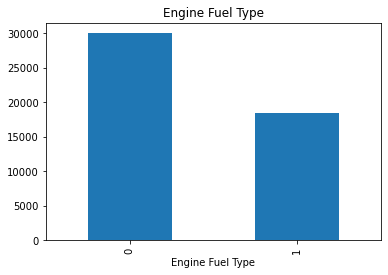

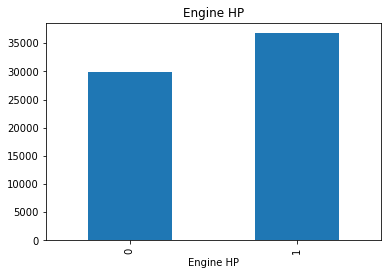

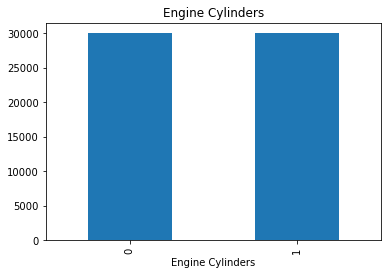

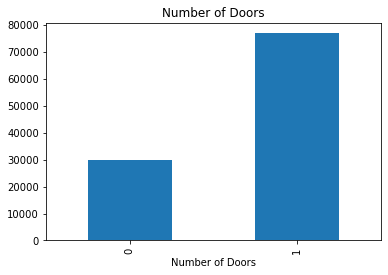

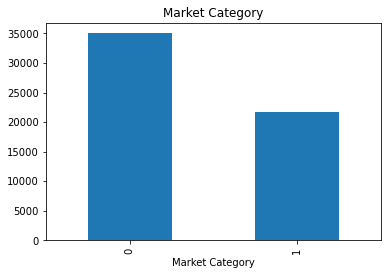

In [61]:
for feature in features_with_na:
    df2 = df.copy()
    
    df2[feature] = np.where(df2[feature].isnull() ,1 ,0)
    df2.groupby(feature)['MSRP'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [62]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes =='O']

categorical_feature

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [63]:
df1.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [64]:
df1['Engine HP'] = df1['Engine HP'].fillna((df1['Engine HP'].mean()))

In [65]:
df1['Engine Cylinders'] = df1['Engine Cylinders'].fillna((df1['Engine Cylinders'].mean()))

In [66]:
df1['Number of Doors'] = df1['Number of Doors'].fillna((df1['Number of Doors'].mean()))

In [67]:
df1.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [68]:
df1 = df1.fillna(df1['Engine Fuel Type'].value_counts().index[0])

In [69]:
df1.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [70]:
df1.rename(columns = {'Engine Fuel Type':'Fuel','Engine HP':'Horsepower','Engine Cylinders':'Cylinders','Transmission Type':'Gearbox','highway MPG':'H_Mileage','city mpg':'C_Mileage','MSRP':'Price'}, inplace=True)

In [71]:
df1.head()

,Make,Model,Year,Fuel,Horsepower,Cylinders,Gearbox,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,H_Mileage,C_Mileage,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [72]:
for col in df1.columns:
    print(col, ': ',len(df1[col].unique()), ' labels')

Make :  48  labels
Model :  915  labels
Year :  28  labels
Fuel :  10  labels
Horsepower :  357  labels
Cylinders :  10  labels
Gearbox :  5  labels
Driven_Wheels :  4  labels
Number of Doors :  4  labels
Vehicle Size :  3  labels
Vehicle Style :  16  labels
H_Mileage :  59  labels
C_Mileage :  69  labels
Popularity :  48  labels
Price :  6049  labels


In [73]:
df1.columns

Index(['Make', 'Model', 'Year', 'Fuel', 'Horsepower', 'Cylinders', 'Gearbox',
       'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style',
       'H_Mileage', 'C_Mileage', 'Popularity', 'Price'],
      dtype='object')

**Step 2: Feature Engineering & Feature Selection**

In [74]:
df2 = df1[['Year', 'Fuel', 'Horsepower', 'Cylinders', 'Gearbox','Driven_Wheels','Number of Doors', 'Vehicle Size','H_Mileage', 'C_Mileage', 'Price']]

In [75]:
df2.head()

,Year,Fuel,Horsepower,Cylinders,Gearbox,Driven_Wheels,Number of Doors,Vehicle Size,H_Mileage,C_Mileage,Price
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,34500


In [76]:
fuel = pd.get_dummies(df2['Fuel'],drop_first=True)

In [77]:
transmission = pd.get_dummies(df2['Gearbox'],drop_first=True)

In [78]:
Driven_Wheels = pd.get_dummies(df2['Driven_Wheels'],drop_first=True)

In [79]:
VehicleSize = pd.get_dummies(df2['Vehicle Size'])

In [80]:
df3 = df2
df3.head()

,Year,Fuel,Horsepower,Cylinders,Gearbox,Driven_Wheels,Number of Doors,Vehicle Size,H_Mileage,C_Mileage,Price
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,34500


In [81]:
df3  = pd.concat([df3,fuel,transmission,Driven_Wheels,VehicleSize], axis=1)

In [82]:
df4=df3.drop(['Fuel','Gearbox','Driven_Wheels','Vehicle Size'], axis=1)

In [83]:
df4.head()

,Year,Horsepower,Cylinders,Number of Doors,H_Mileage,C_Mileage,Price,electric,flex-fuel (premium unleaded recommended/E85),flex-fuel (premium unleaded required/E85),...,AUTOMATIC,DIRECT_DRIVE,MANUAL,UNKNOWN,four wheel drive,front wheel drive,rear wheel drive,Compact,Large,Midsize
0,2011,335.0,6.0,2.0,26,19,46135,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,2011,300.0,6.0,2.0,28,19,40650,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,2011,300.0,6.0,2.0,28,20,36350,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,2011,230.0,6.0,2.0,28,18,29450,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,2011,230.0,6.0,2.0,28,18,34500,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [137]:
y = df4['Price']
y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: Price, dtype: int64

In [138]:
X = df4.drop(['Price'], axis=1)
X.head()

,Year,Horsepower,Cylinders,Number of Doors,H_Mileage,C_Mileage,electric,flex-fuel (premium unleaded recommended/E85),flex-fuel (premium unleaded required/E85),flex-fuel (unleaded/E85),...,AUTOMATIC,DIRECT_DRIVE,MANUAL,UNKNOWN,four wheel drive,front wheel drive,rear wheel drive,Compact,Large,Midsize
0,2011,335.0,6.0,2.0,26,19,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,2011,300.0,6.0,2.0,28,19,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,2011,300.0,6.0,2.0,28,20,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,2011,230.0,6.0,2.0,28,18,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,2011,230.0,6.0,2.0,28,18,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [140]:
X_train.shape, X_test.shape

((8339, 25), (3575, 25))

In [141]:
y_test.shape, y_train.shape

((3575,), (8339,))

**Step 3: Applying RandomForest Machine Learning Algorithm**

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
regressor=RandomForestRegressor()

In [144]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [147]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [148]:
rf = RandomForestRegressor()

In [149]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [150]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  15.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

**Step 4:Evalution & Testing of Model**

In [151]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [152]:
rf_random.best_score_

-688836603.890477

In [153]:
y_pred = rf_random.predict(X_test)

In [154]:
y_pred

array([35792.94152778,  2287.66623492, 50727.48764128, ...,
       24866.82417566, 28806.43762148, 17648.58831757])

In [155]:
from sklearn import metrics

In [159]:
metrics.r2_score(y_test, y_pred)

0.931442159674809

**Step 5: Prediction**

In [160]:
df4.columns

Index(['Year', 'Horsepower', 'Cylinders', 'Number of Doors', 'H_Mileage',
       'C_Mileage', 'Price', 'electric',
       'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (premium unleaded required/E85)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (unleaded/natural gas)', 'natural gas',
       'premium unleaded (recommended)', 'premium unleaded (required)',
       'regular unleaded', 'AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL', 'UNKNOWN',
       'four wheel drive', 'front wheel drive', 'rear wheel drive', 'Compact',
       'Large', 'Midsize'],
      dtype='object')

In [189]:
rf_random.predict([[2018,140,4,4,25,12,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1]])

array([54077.84779316])

**Step 6: Deployment of Model**

In [163]:
import pickle
pickle_out = open("rf_random1.pkl","wb")
pickle.dump(rf_random, pickle_out)
pickle_out.close()

In [164]:
X.columns

Index(['Year', 'Horsepower', 'Cylinders', 'Number of Doors', 'H_Mileage',
       'C_Mileage', 'electric', 'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (premium unleaded required/E85)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (unleaded/natural gas)', 'natural gas',
       'premium unleaded (recommended)', 'premium unleaded (required)',
       'regular unleaded', 'AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL', 'UNKNOWN',
       'four wheel drive', 'front wheel drive', 'rear wheel drive', 'Compact',
       'Large', 'Midsize'],
      dtype='object')

In [192]:
import streamlit as st

In [195]:
from flask import Flask, request
import numpy as np
import pickle
import pandas as pd
import flasgger
from flasgger import Swagger

app=Flask(__name__)
Swagger(app)

pickle_in = open("rf_random1.pkl","rb")
classifier=pickle.load(pickle_in)

@app.route('/')
def welcome():
    return "Welcome All"

@app.route('/predict',methods=["Get"])
def predict_car_prices():
    
    """Let's Prdedict the Price of Cars 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: Year
        in: query
        type: number
        required: true
      - name: Horsepower
        in: query
        type: number
        required: true
      - name: Cylinders
        in: query
        type: number
        required: true
      - name: Number of Doors
        in: query
        type: number
        required: true
      - name: H_Mileage
        in: query
        type: number
        required: true
      - name: C_mileage
        in: query
        type: number
        required: true
      - name: electric
        in: query
        type: number
        required: true
      - name: flex-fuel (premium unleaded recommended/E85)
        in: query
        type: number
        required: true
      - name: flex-fuel (premium unleaded required/E85)
        in: query
        type: number
        required: true
      - name: flex-fuel (unleaded/E85)
        in: query
        type: number
        required: true
      - name: flex-fuel (unleaded/natural gas)
        in: query
        type: number
        required: true
      - name: natural gas
        in: query
        type: number
        required: true
      - name: premium unleaded (recommended)
        in: query
        type: number
        required: true
      - name: premium unleaded (required)
        in: query
        type: number
        required: true
      - name: regular unleaded
        in: query
        type: number
        required: true
      - name: AUTOMATIC
        in: query
        type: number
        required: true
      - name: DIRECT_DRIVE
        in: query
        type: number
        required: true
      - name: MANUAL
        in: query
        type: number
        required: true
      - name: UNKNOWN
        in: query
        type: number
        required: true
      - name: four wheel drive
        in: query
        type: number
        required: true
      - name: front wheel drive
        in: query
        type: number
        required: true
      - name: rear wheel drive
        in: query
        type: number
        required: true
      - name: Compact
        in: query
        type: number
        required: true
      - name: Large
        in: query
        type: number
        required: true
      - name: Midsize
        in: query
        type: number
        required: true
      responses:
        200:
            description: The output values
        
    """
    Year=request.args.get("Year")
    Horsepower=request.args.get("Horsepower")
    Cylinders=request.args.get("Cylinders")
    Number_of_Doors=request.args.get("Number of Doors")
    H_Mileage=request.args.get("H_Mileage")
    C_Mileage=request.args.get("C_Mileage")
    electric=request.args.get("electric")
    flex_fuel_recommended=request.args.get("flex-fuel (premium unleaded recommended/E85)")
    flex_fuel_required=request.args.get("flex-fuel (premium unleaded required/E85)")
    flex_fuel_unleaded=request.args.get("flex-fuel (unleaded/E85)")
    flex_fuel_unleaded_natural_gas=request.args.get("flex-fuel (unleaded/natural gas)")
    natural_gas=request.args.get("natural gas")
    premium_unleaded_recommended=request.args.get("premium unleaded (recommended)")
    premium_unleaded_required=request.args.get("premium unleaded (required)")
    regular_unleaded=request.args.get("regular unleaded")
    AUTOMATIC=request.args.get("AUTOMATIC")
    DIRECT_DRIVE=request.args.get("DIRECT_DRIVE")
    MANUAL=request.args.get("MANUAL")
    UNKNOWN=request.args.get("UNKNOWN")
    four_wheel_drive=request.args.get("four wheel drive")
    front_wheel_drive=request.args.get("front wheel drive")
    rear_wheel_drive=request.args.get("rear wheel drive")
    Compact=request.args.get("Compact")
    Large=request.args.get("Large")
    Midsize=request.args.get("Midsize")
    prediction=rf_random.predict([[Year,Horsepower,Cylinders,Number_of_Doors,H_Mileage,C_Mileage,electric,flex_fuel_recommended,flex_fuel_required/E85,flex_fuel_unleaded,flex_fuel_unleaded_natural_gas,natural_gas,premium_unleaded_recommended,premium_unleaded_required,regular_unleaded,AUTOMATIC,DIRECT_DRIVE,MANUAL,UNKNOWN,four_wheel_drive,front_wheel_drive,rear_wheel_drive,Compact,Large,Midsize]])
    print(prediction)
    return "Hello The Price of car in US Dollar is"+str(prediction)


if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
2021-05-28 18:46:02.722 INFO    werkzeug:  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/May/2021 18:46:12] "GET / HTTP/1.1" 200 -
2021-05-28 18:46:12.026 INFO    werkzeug: 127.0.0.1 - - [28/May/2021 18:46:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 18:46:22] "GET /apidocs/ HTTP/1.1" 200 -
2021-05-28 18:46:22.749 INFO    werkzeug: 127.0.0.1 - - [28/May/2021 18:46:22] "GET /apidocs/ HTTP/1.1" 200 -
[2021-05-28 18:46:24,496] ERROR in app: Exception on /apispec_1.json [GET]
Traceback (most recent call last):
  File "C:\Users\ASHISH\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\ASHISH\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\ASHISH\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    rerai